In [34]:
import mysql.connector

In [35]:
remote = mysql.connector.connect(
    host = "eda-database.c3oek28e8yta.ap-northeast-2.rds.amazonaws.com",
    port = 3306,
    user = "admin",
    password = "rlawlswo1",
    database = "workspace"
)

In [36]:
import pandas as pd

In [37]:
interest_rate_addr = "../data/주요국 통화의 대원화 환율.xlsx"
df = pd.read_excel(interest_rate_addr, header=6, usecols="A,B")
df.rename(columns={df.columns[0]:"date",
                   df.columns[1]:"exchange_rate_wd"},
                   inplace=True)
df.set_index(df.columns[0], inplace=True)
df.head()

,exchange_rate_wd
date,
1990-03-02,693.0
1990-03-05,695.1
1990-03-06,696.4
1990-03-07,697.6
1990-03-08,698.1


In [38]:
corona_interval = df["2004-08-01":]
corona_interval

,exchange_rate_wd
date,
2004-08-02,1164.8
2004-08-03,1165.2
2004-08-04,1167.6
2004-08-05,1163.4
2004-08-06,1162.6
...,...
2024-09-23,1335.9
2024-09-24,1334.9
2024-09-25,1331.0


In [39]:
import numpy as np

In [40]:
month_init = corona_interval.index[0]

In [41]:
monthly = []
month = month_init[:-3]
count = 0
sum = 0.
mean = 0.
for index, row in corona_interval.iterrows():
    # print(index, row["k_interest_rate"], row["usa_interest_rate"])
    if str(row["exchange_rate_wd"]) != "nan":
        count = count + 1

        # print(now_month)
        sum = sum + float(row["exchange_rate_wd"])
        
        now_month = index[:-3]
        month_info = []

        if month != now_month:
            mean = round(sum / count, 1)

            month_info.append(now_month + str("-01"))
            month_info.append(mean)

            monthly.append(month_info)

            month = now_month
            count = 0
            sum = 0.

monthly


[['2004-09-01', 1157.8],
 ['2004-10-01', 1147.7],
 ['2004-11-01', 1140.6],
 ['2004-12-01', 1083.2],
 ['2005-01-01', 1050.5],
 ['2005-02-01', 1037.6],
 ['2005-03-01', 1019.3],
 ['2005-04-01', 1008.0],
 ['2005-05-01', 1009.4],
 ['2005-06-01', 1002.9],
 ['2005-07-01', 1013.2],
 ['2005-08-01', 1037.2],
 ['2005-09-01', 1022.1],
 ['2005-10-01', 1029.7],
 ['2005-11-01', 1046.2],
 ['2005-12-01', 1040.2],
 ['2006-01-01', 1021.9],
 ['2006-02-01', 981.5],
 ['2006-03-01', 970.4],
 ['2006-04-01', 975.2],
 ['2006-05-01', 951.4],
 ['2006-06-01', 941.6],
 ['2006-07-01', 955.2],
 ['2006-08-01', 951.1],
 ['2006-09-01', 961.2],
 ['2006-10-01', 952.2],
 ['2006-11-01', 953.7],
 ['2006-12-01', 935.0],
 ['2007-01-01', 924.9],
 ['2007-02-01', 937.4],
 ['2007-03-01', 937.5],
 ['2007-04-01', 943.0],
 ['2007-05-01', 930.6],
 ['2007-06-01', 927.3],
 ['2007-07-01', 927.8],
 ['2007-08-01', 918.6],
 ['2007-09-01', 935.5],
 ['2007-10-01', 929.5],
 ['2007-11-01', 914.4],
 ['2007-12-01', 919.1],
 ['2008-01-01', 931.4],

In [42]:
monthly_df = pd.DataFrame(monthly, columns=["date", "exchange_rate_wd"])
monthly_df.set_index("date", inplace=True)
monthly_df.tail()

,exchange_rate_wd
date,
2024-05-01,1370.5
2024-06-01,1365.1
2024-07-01,1380.1
2024-08-01,1382.8
2024-09-01,1351.5


In [43]:
monthly_df.head()

,exchange_rate_wd
date,
2004-09-01,1157.8
2004-10-01,1147.7
2004-11-01,1140.6
2004-12-01,1083.2
2005-01-01,1050.5


In [44]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from matplotlib.colors import ListedColormap
import matplotlib.ticker as ticker
from matplotlib import dates
import matplotlib.dates as mdates
import datetime

In [45]:
temp = list(monthly_df.index)
len(temp)
np.arange(0, len(temp), 12)

array([  0,  12,  24,  36,  48,  60,  72,  84,  96, 108, 120, 132, 144,
       156, 168, 180, 192, 204, 216, 228, 240])

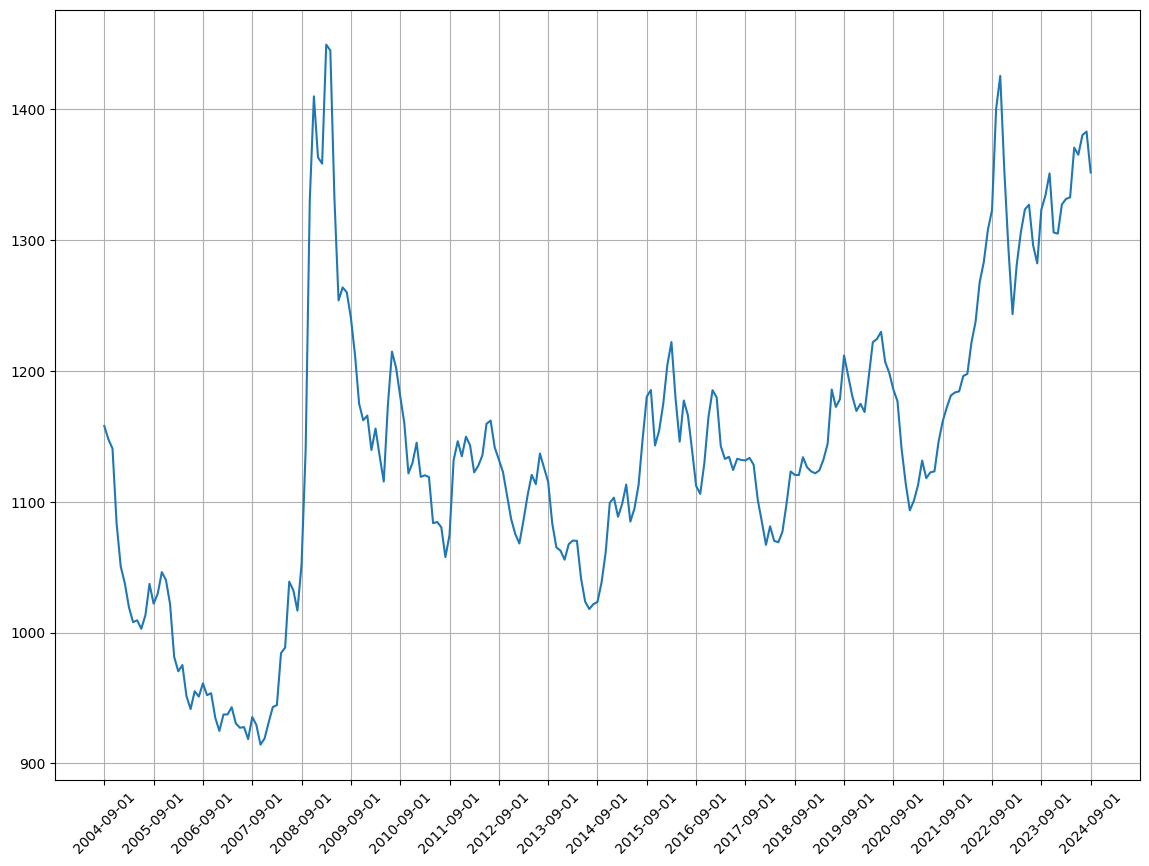

In [46]:
plt.figure(figsize=(14,10))
plt.plot(monthly_df)
plt.xticks(np.arange(0, len(temp), 12), rotation=45)
plt.grid()
plt.show()

In [47]:
remote = mysql.connector.connect(
    host = "eda-database.c3oek28e8yta.ap-northeast-2.rds.amazonaws.com",
    port = 3306,
    user = "admin",
    password = "rlawlswo1",
    database = "workspace"
)

In [48]:
cur = remote.cursor()

sql = open("../sql_script/insert_exchange_rate.sql").read()
for index, row in monthly_df.iterrows():
    temp = [index, row["exchange_rate_wd"]]
    print(temp)
    cur.execute(sql, tuple(temp))
    remote.commit()

cur.execute("select * from exchange_rate")
result = cur.fetchall()
for row in result:
    print(row)

['2004-09-01', np.float64(1157.8)]
['2004-10-01', np.float64(1147.7)]
['2004-11-01', np.float64(1140.6)]
['2004-12-01', np.float64(1083.2)]
['2005-01-01', np.float64(1050.5)]
['2005-02-01', np.float64(1037.6)]
['2005-03-01', np.float64(1019.3)]
['2005-04-01', np.float64(1008.0)]
['2005-05-01', np.float64(1009.4)]
['2005-06-01', np.float64(1002.9)]
['2005-07-01', np.float64(1013.2)]
['2005-08-01', np.float64(1037.2)]
['2005-09-01', np.float64(1022.1)]
['2005-10-01', np.float64(1029.7)]
['2005-11-01', np.float64(1046.2)]
['2005-12-01', np.float64(1040.2)]
['2006-01-01', np.float64(1021.9)]
['2006-02-01', np.float64(981.5)]
['2006-03-01', np.float64(970.4)]
['2006-04-01', np.float64(975.2)]
['2006-05-01', np.float64(951.4)]
['2006-06-01', np.float64(941.6)]
['2006-07-01', np.float64(955.2)]
['2006-08-01', np.float64(951.1)]
['2006-09-01', np.float64(961.2)]
['2006-10-01', np.float64(952.2)]
['2006-11-01', np.float64(953.7)]
['2006-12-01', np.float64(935.0)]
['2007-01-01', np.float64(924.9

In [49]:
remote.close()